<big style="font-size:30px;"><center><b>Лабораторная работа №1</b></center></big>

# Цель работы

Освоение основных яркостных и геометрических характеристик изображений и их использование для анализа изображений.

# Теоретические сведения

Пиксель цифрового изображения характеризуется тремя параметрами: $(x, y, I)$, где пара целочисленных значений $(x, y)$ описывает геометрическое положение пикселя в плоскости изображения, а значение $I$ характеризует его яркость (интенсивность) в точке плоскости. Таким образом, в изображении можно выделить яркостную и геометрическую составляющие. В общем случае данные составляющие не связаны между собой (например, изменение в освещенности сцены не изменит геометрических параметров объектов на сцене). Из-за этого проще исследовать отдельно яркостные свойства изображения и отдельно — геометрические. Такой подход понижает порядок исследуемого изображения в случае геометрических свойств с $n = 3$ $(x, y, I)$ до $n = 2$ $(x, y)$, а в случае яркостных свойств — до $n = 1$ $(I)$. Яркостная составляющая изображения характеризуется одномерным массивом гистограммы, из которого можно вычислить контраст.

_Гистограмма_ — это распределение частоты встречаемости пикселей одинаковой яркости на изображении.

_Яркость_ — это среднее значение интенсивности сигнала.

_Контраст_ — это интервал значений между минимальной и максимальной яркостями изображения.

Для сведения геометрических составляющих изображения к одномерному массиву данных $n = 1$ используются такие характеристики, как _«профили»_ и _«проекции»_ изображения.

_Профиль_ вдоль линии — это функция интенсивности изображения, распределенного вдоль данной линии (_прорезки_).

_Проекция_ на ось — это сумма интенсивностей пикселей изображения взятая в направлении перпендикулярном данной оси.

## Гистограмма изображения

Для $8$-битного полутонового изображения гистограмма яркости представляет собой одномерный целочисленный массив $Hist$ из $256$ элементов $[0...255]$. Элементом гистограммы $Hist[i]$ является сумма пикселей изображения с яркостью $i$. По визуальному отображению гистограммы можно оценить необходимость изменения яркости и контрастности изображения, оценить площадь, занимаемую светлыми и темными элементами, определить местоположение на плоскости изображения отдельных объектов, соответствующих некоторым диапазонам яркости. Для цветного $RGB$-изображения необходимо построить три гистограммы по каждому цвету.

Если гистограмма неравномерна, то для улучшения изображения можно ее выровнять, причем выравнивание гистограммы в зависимости от решаемой задачи можно выполнять различным образом.

###  Арифметические операции

Простейшими способами выравнивания гистограммы являются арифметические операции с изображениями. Например, в случае, если большинство значений гистограммы находятся слева, то изображение является темным. Для увеличения детализации темных областей можно сдвинуть гистограмму правее, в более светлую область, например, на 50 градаций для каждого цвета.

Данный метод используется в случаях, когда гистограмма исходного изображения сдвигается в среднюю часть диапазона, которая является более приемлемой с точки зрения изуального восприятия. Недостатки подхода: повышение интенсивностей темных областей приводит к сдвигу светлых к максимуму, что может привести к потере информации в светлых областях.

### Растяжение динамического диапазона

Если интенсивности пикселей областей интереса находятся в узком динамическом диапазоне, то можно растянуть этот диапазон. Подобные преобразования выполняются согласно следующему выражению:

$$I_{new} = \left( \frac{I-I_{min}}{I_{max} - I_{min}} \right)^\alpha$$

где $I$ и $I_{new}$ — массивы значений интенсивностей исходного и нового изображений соответственно; $I_{min}$ и $I_{max}$ — минимальное и
максимальное значения интенсивностей исходного изображения соответственно; $\alpha$ — коэффициент нелинейности.

Данное выражение является нелинейным из-за коэффициента $\alpha$. В случае, если $\alpha = 1$, применение этой формулы к исходному изображению не даст желаемого эффекта, поскольку гистограммы цветовых компонент изображения занимают весь возможный диапазон. Нелинейные преобразования проводятся для каждой цветовой составляющей.

### Равномерное преобразование

Осуществляется по следующей формуле:

$$I_{new} = \left( I_{max} - I_{min} \right) \cdot P(I) + I_{min}$$

где $I_{min}$, $I_{max}$ — минимальное и максимальное значения интенсивностей исходного изображения $I$; $P(I)$ — функция распределения вероятностей исходного изображения, которая аппроксимируется кумулятивной гистограммой:

$$P(I) = \sum_{m=0}^iHist(m)$$

### Экспоненциальное преобразование

Осуществляется по следующей формуле:

$$I_{new} = I_{min} - \frac{1}{\alpha} \cdot \ln (1- P(I))$$

где $\alpha$ — постоянная, характеризующая крутизну преобразования. Согласно этой формуле можно вычислить значения интенсивностей пикселей результирующего изображени

### Преобразование по закону Рэлея

Осуществляется по следующей формуле:

$$I_{new} = I_{min} + \left( 2\alpha^2 \ln \left( \frac{1}{1 - P(I)} \right) \right)^\frac{1}{2}$$

где $\alpha$ — постоянная, характеризующая гистограмму распределения интенсивностей элементов результирующего изображения

### Преобразование по закону степени 2/3

Осуществляется по следующей формуле:

$$I_{new} = P(I)^{\frac{2}{3}}$$

### Гиперболическое преобразованиe

Осуществляется по следующей формуле:

$$I_{new} = \alpha^{P(I)}$$

где $\alpha$ — постоянная, относительно которой осуществляется преобразование и, как правило, равная минимальному значению интен-сивности элементов исходного изображения $\alpha = I_{min}$

## Проекция изображения

_Проекцией изображения_ на некоторую ось называется сумма интенсивностей пикселей изображения в направлении, перпендикулярном данной оси. Простейшим случаем проекции двумерного изображения являются вертикальная проекция на ось $Ox$, представляющая собой сумму интенсивностей пикселей _по столбцам_ изображения:

$$Proj X(y) = \sum_{y=0}^{dim Y - 1} I(x, y)$$

и горизонтальная проекция на ось $Oy$, представляющая собой сумму интенсивностей пикселей _по строкам_ изображения:

$$Proj Y(x) = \sum_{x=0}^{dim X - 1} I(x, y)$$

Запишем выражение для проекции на произвольную ось. Допустим, что направление оси задано единичным вектором с координатами $(e_x, e_y)$. Тогда проекция изображения на ось $O_e$ определяется следующим выражением:

$$Proj E(t) = \sum_{xe_x + ye_y = t} I(x, y)$$

Анализ массива проекции позволяет выделять характерные точки функции проекции, которые соответствуют контурам объектов на изображении. Например, если на изображении имеются контрастные объекты, то в проекции будут видны перепады или экстремумы функции, соответствующие положению каждого из объектов.

## Профиль изображения

_Профилем изображения_ вдоль некоторой линии называется функция интенсивности изображения, распределенного вдоль данной линии (_прорезки_). Простейшим случаем профиля изображения является профиль строки:

$$Profile \; i(x) = I(x, i)$$

где $i$ — номер строки изображения $I$

Профиль столбца изображения:

$$Profile \; j(x) = I(j, y)$$

где $j$ — номер столбца изображения $I$

В общем случае профиль можно рассматривать вдоль любой прямой, ломаной или кривой линии, пересекающей изображение. После формирования массива профиля изображения проводится его анализ стандартными средствами. Анализ позволяет автоматически выделять особые точки функции профиля, соответствующие контурам изображения, пересекаемым данной линией.

## Ход выполнения работы

### Постановка задачи

1. _Гистограммы_. Выбрать произвольное слабоконтрастное изображение. Выполнить выравнивание гистограммы и растяжение контраста, использовать рассмотренные преобразования. Сравнить полученные результаты.
2. _Проекции_. Выбрать произвольное изображение, содержащее монотонные области и выделяющиеся объекты. Произвести построение проекций изображения на вертикальную и горизонтальную оси. Определить границы областей объектов.
3. _Профили_. Выбрать произвольное изображение, содержащие штрих-код. Выполнить построение профиля изображения вдоль штрих-кода.

### Библиотеки и настройки

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple, List

In [2]:
%matplotlib inline

### Гистограммы

Функция отображения изображений и соответствующих им гистограмм:

In [3]:
def show(images: List, hist=False, labels: List[str] = None, hist_size: List[int] = [256],
         hist_range: Tuple[int] = (0, 256), figsize=(8, 4.3), dpi=100) -> None:

    if not isinstance(images, list):
        images = [images, ]
    
    for i, image in enumerate(images):
        fig, ax = plt.subplots(nrows=1, ncols=(2 if hist else 1),
                               subplot_kw={'box_aspect': 1},
                               figsize=figsize, dpi=dpi,
                               constrained_layout=True)
        if not hist:
            ax = [ax, ]
            
        if labels:
            fig.suptitle(labels[i])

        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].axis('off')

        if hist:
            for j, color in enumerate(('blue', 'green', 'red')):
                histogram = cv2.calcHist(
                    [image], [j], None, hist_size, hist_range)
                ax[1].plot(histogram, color=color, linewidth=0.5)

    plt.show()

Класс, реализующий операции преобразования изображения:

In [4]:
class ImageTransform:
    
    def __init__(self, img):
        self.__img = img
    
    @property
    def img(self):
        return self.__img
       
    @img.setter
    def img(self, img):
        self.__img = img
        
    def __to_float(self, img):
        if img.dtype == np.uint8:
            return img.astype(np.float32) / 255
        return img
    
    def __to_int(self, img):
        if img.dtype == np.float32:
            return (255 * img).clip(0, 255).astype(np.uint8)
        return img
    
    def add_to_hist(self, const=50):
        return self.img + const
    
    def __foreach(self, f):
        new_img = self.__to_float(self.img.copy())
        for i, layer in enumerate(cv2.split(new_img)):
            new_img[:, :, i] = f(layer, i)
        return self.__to_int(new_img)
    
    def dynamic_range_stretch(self, alpha=0.5):
        return self.__foreach(lambda l, i: np.clip((((l - l.min()) / (l.max() - l.min())) ** alpha), 0, 1))
    
    def __cum_hist(self, layer_idx):
        hist = cv2.calcHist([self.img], [layer_idx], mask=None, histSize=[256], ranges=(0, 256))
        return (np.cumsum(hist) / (self.img.shape[0] * self.img.shape[1]))[self.img[:, :, layer_idx]]
    
    def uniform_transform(self):
        return self.__foreach(lambda l, i: (l.max() - l.min()) * self.__cum_hist(i) + l.min())
    
    def exp_transform(self, alpha=2.5, const=1e-15):
        return self.__foreach(lambda l, i: l.min() - np.log(const + 1 - self.__cum_hist(i)) / alpha)
    
    def rayleigh_transform(self, alpha=0.2, const=1e-15):
        return self.__foreach(lambda l, i: l.min() + (2*alpha**2 * np.log(1 / (1 - self.__cum_hist(i) + const)))**0.5)
    
    def pow_2_3_transform(self):
        return self.__foreach(lambda l, i: self.__cum_hist(i) ** (2 / 3))
    
    def hyperbolic_transform(self, alpha=None):
        return self.__foreach(lambda l, i: (alpha if alpha else l.min()) ** self.__cum_hist(i))

Объявим экземпляр класса, передав в него исходное изображение, и поочередно вызовем все его методы по преобразованию изображения, выведем результаты:

In [5]:
it = ImageTransform(cv2.imread('pictures/1.jpg'))

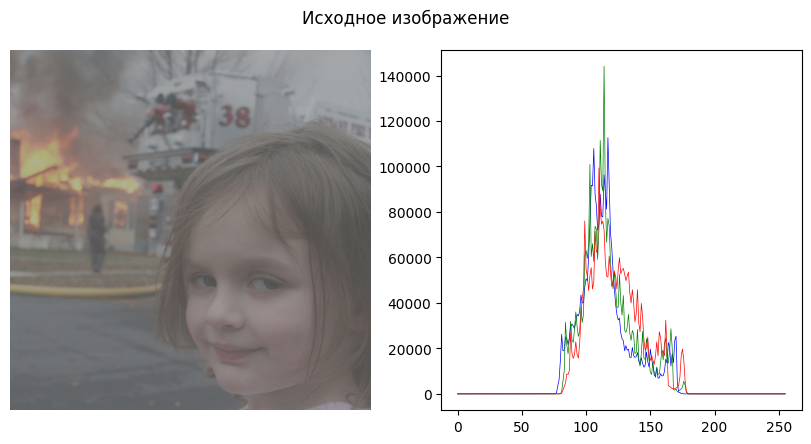

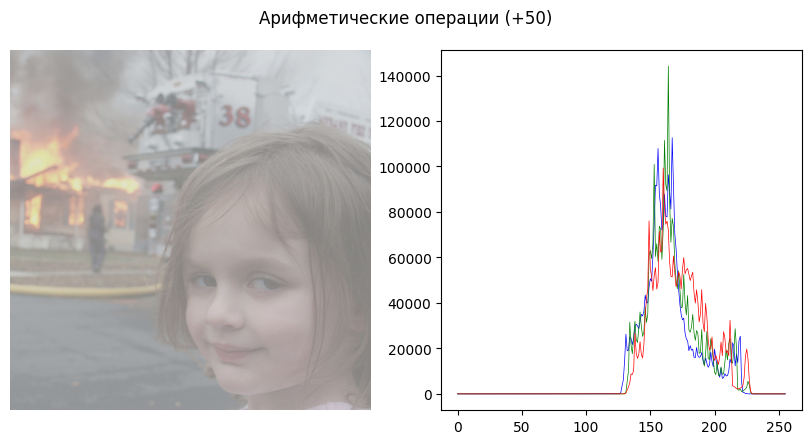

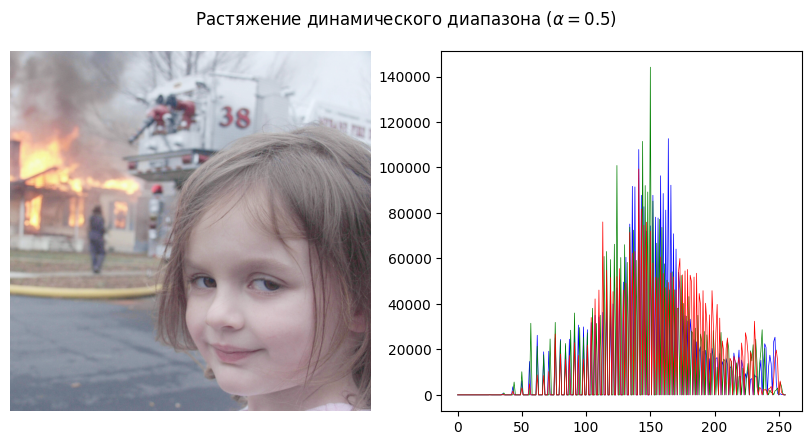

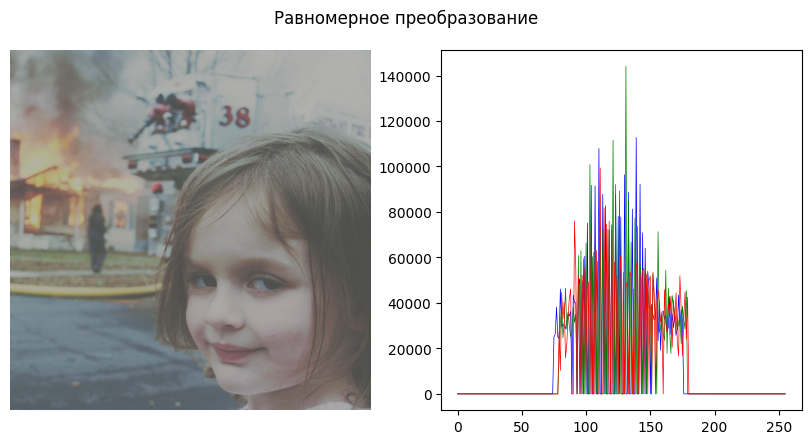

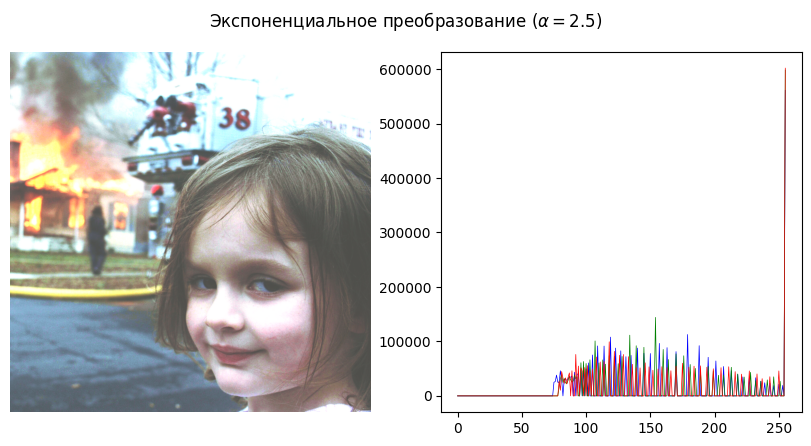

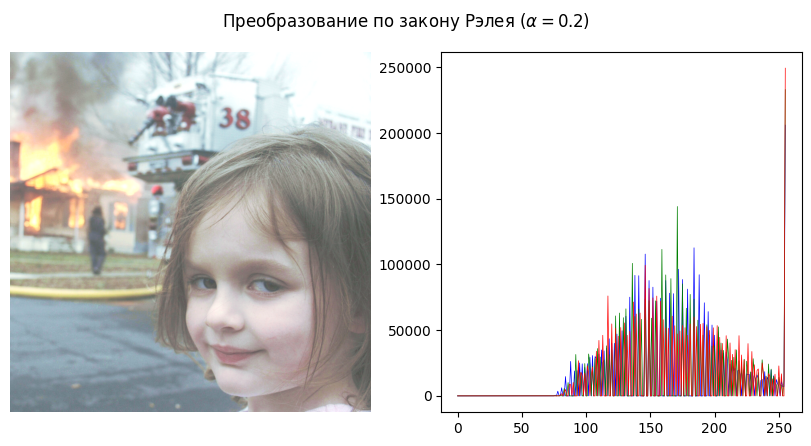

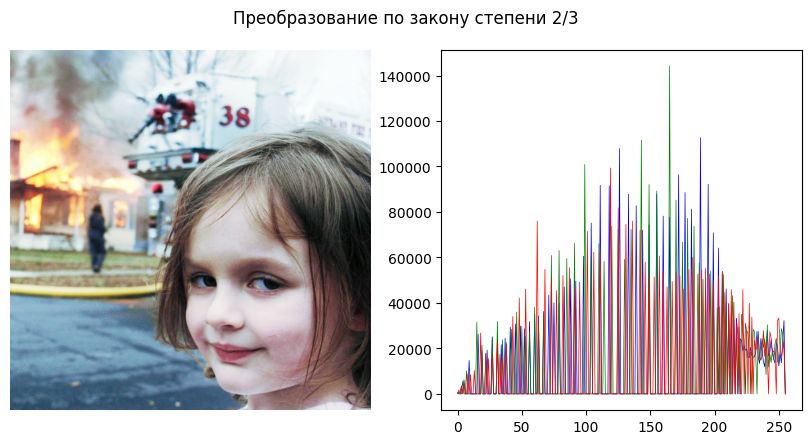

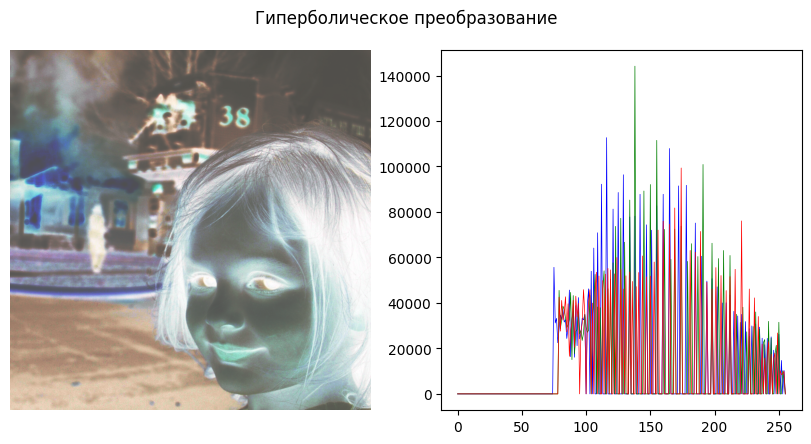

In [6]:
show(images=[it.img,
             it.add_to_hist(const=50),
             it.dynamic_range_stretch(alpha=0.5),
             it.uniform_transform(),
             it.exp_transform(alpha=2.5),
             it.rayleigh_transform(alpha=0.3),
             it.pow_2_3_transform(),
             it.hyperbolic_transform(alpha=None)],
     hist=True,
     labels=[r'Исходное изображение',
             r'Арифметические операции (+50)',
             r'Растяжение динамического диапазона ($\alpha = 0.5$)',
             r'Равномерное преобразование',
             r'Экспоненциальное преобразование ($\alpha = 2.5$)',
             r'Преобразование по закону Рэлея ($\alpha = 0.2$)',
             r'Преобразование по закону степени 2/3',
             r'Гиперболическое преобразование'],
     )

### Проекция изображения

Функция отображения проекции изображения вдоль центральной линии по оси $Ox$ и $Oy$:

In [7]:
def improjection(images, figsize=(12, 12), dpi=70):

    if not isinstance(images, list):
        images = [images, ]

    for i, image in enumerate(images):
        fig, ax = plt.subplots(nrows=1, ncols=2,
                               subplot_kw={'box_aspect': 1},
                               figsize=figsize, dpi=dpi,
                               constrained_layout=True)
        
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].axis('off')
        
        ax[1].plot(np.sum(image, (0, 2)) / 255 / image.shape[2], label='Проекция на Ox')
        ax[1].plot(np.sum(image, (1, 2)) / 255 / image.shape[2], label='Проекция на Oy')
        ax[1].legend()
        
    plt.show()

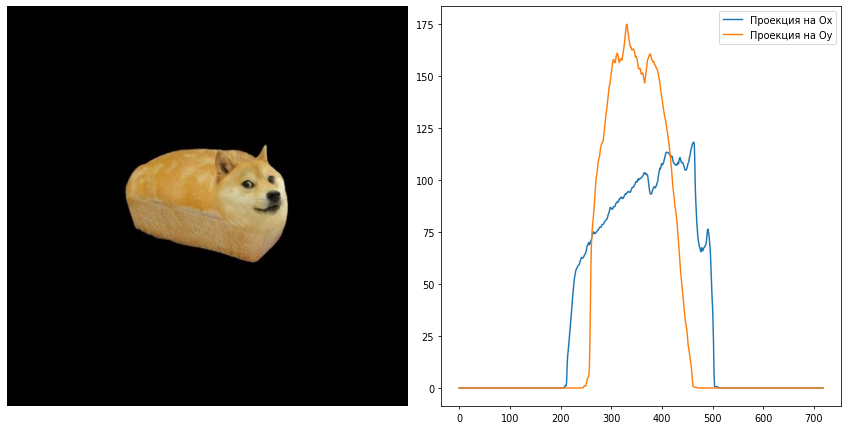

In [8]:
improjection(cv2.imread('pictures/2.jpg'))

### Профиль изображения

Функция отображения профиля изображения вдоль центральной линии по оси $Ox$:

In [9]:
def improfile(images, layers=None, figsize=(8, 4), dpi=100,
              show_img=True, colors=('blue', 'green', 'red')):

    if not isinstance(images, list):
        images = [images, ]

    for i, image in enumerate(images):
        fig, ax = plt.subplots(nrows=1, ncols=(2 if show_img else 1),
                               subplot_kw={'box_aspect': 1},
                               figsize=figsize, dpi=dpi,
                               constrained_layout=True)
        if show_img:
            ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax[0].axis('off')
        else:
            ax = [ax, ]

        row = int(image.shape[0] / 2)
        layers = layers if layers else range(image.shape[2])
        for layers_idx in layers:
            profile = image[row, :, layers_idx]
            ax[int(show_img)].plot(profile, color=colors[layers_idx])

    plt.show()

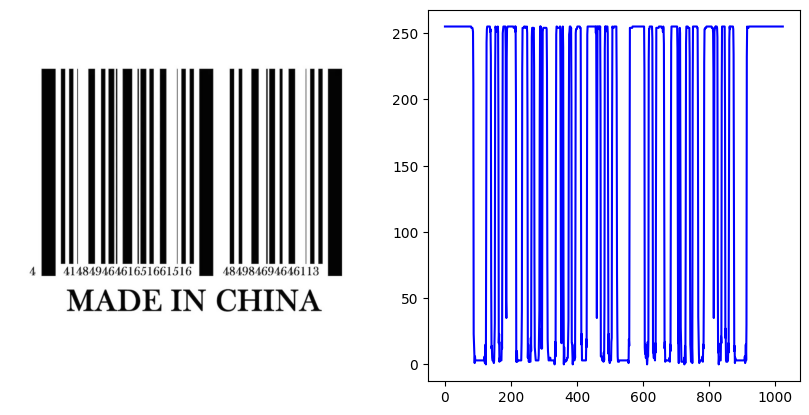

In [10]:
improfile(cv2.imread('pictures/3.jpg'), layers=[0])

[](https://github.com/d3dx13/The-basics-of-Computer-Vision)